In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adicionando o marcador circular
ERB = [-2.58031, -44.2372]
DESTINY = [-2.5199, -44.1396]

radius = 1.5*10e3

map_folium = folium.Map(location=ERB, zoom_start=11.3)

folium.Marker(location=ERB,
              popup='ERB',
              icon=folium.Icon(color='red', icon='info-sign')
).add_to(map_folium)

folium.Marker(location=DESTINY,
              popup='Destino',
              icon=folium.Icon(color='blue', icon='info-sign')
).add_to(map_folium)

In [3]:
points = (ERB, DESTINY)
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(map_folium)

folium.Circle(
    location=ERB,
    radius=radius,
    color='blue',
    fill=True,
    opacity=0.5,
    fill_color='lightblue'
).add_to(map_folium)

folium.Circle(
    location=ERB,
    radius=radius/2,
    color='red',
    fill=True,
    opacity=0.5,
    fill_color='lightred'
).add_to(map_folium)

In [4]:
popup1 = folium.LatLngPopup()
#map_folium.add_child(folium.ClickForMarker(popup="Ponto"))
map_folium.add_child(popup1)

display(map_folium)

In [6]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

d = geodesic(ERB, DESTINY).km
print(d)

12.744911046614076


In [7]:
# Hata Model Frequency 150 – 1000 (MHz)
f = 900

# Base station height 30 – 200 (m)
Hb = 40

# Mobile Height 1 – 10 (m)
Hm = 1.5

# Distance 1 – 20 (km)
d = range(1, 20)

#Urban Area Loss small medium city (dB)
def log10(num):
    return np.log10(num)

asm = (((1.1*log10(f))-0.7)*Hm)-((1.56*log10(f))-0.8)
Lusm = 69.55 + (26.16*log10(f)) - (13.82*log10(Hb)) - asm + ((44.9 - (6.55*log10(Hb)))*log10(d))

#Urban Area Loss large city (dB)
if f <= 200:
    al = (8.29*(log10(1.54*Hm)**2))-1.1
    Lul = 69.55 + (26.16*log10(f)) - (13.82*log10(Hb)) - al + ((44.9 - (6.55*log10(Hb)))*log10(d))
elif f >= 400:
    al = (3.2*(log10(11.75*Hm)**2))-4.97
    Lul = 69.55 + (26.16*log10(f)) - (13.82*log10(Hb)) - al + ((44.9 - (6.55*log10(Hb)))*log10(d))
else:
    print('frequency range undefine')

#Suburban Area Loss small medium city (dB)
Lsusm = Lusm - (2*(log10(f/28)**2))-5.4

#Suburban Area large city (dB)
Lsul = Lul - (2*(log10(f/28)**2))-5.4

#Rural Area small medium city (Quasi-Open) (dB)
Lrqosm = Lusm - (4.78*(log10(f)**2))+(18.33*log10(f))-35.94

#Rural Area large city (Quasi-Open) (dB)
Lrqol = Lul - (4.78*(log10(f)**2))+(18.33*log10(f))-35.94

#Rural Area small medium city (Open Area) (dB)
Lrosm = Lusm - (4.78*(log10(f)**2))+(18.33*log10(f))-40.94

#Rural Area large city (Open Area) (dB)
Lrol = Lul - (4.78*(log10(f)**2))+(18.33*log10(f))-40.94

In [8]:
Lusm

162.7074118478214

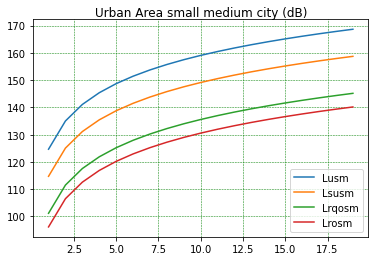

In [20]:
plt.plot(d, Lusm,   label="Lusm")
plt.plot(d, Lsusm,  label="Lsusm")
plt.plot(d, Lrqosm, label="Lrqosm")
plt.plot(d, Lrosm,  label="Lrosm" )

plt.title('Urban Area small medium city (dB)', pad=-20)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.legend(loc="lower right")
plt.show()

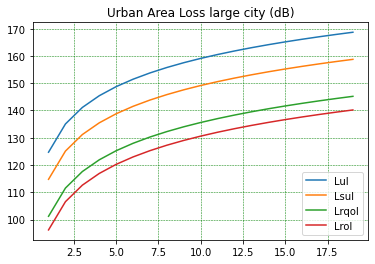

In [22]:
plt.plot(d, Lul,   label="Lul")
plt.plot(d, Lsul,  label="Lsul")
plt.plot(d, Lrqol, label="Lrqol")
plt.plot(d, Lrol,  label="Lrol" )

plt.title('Urban Area Loss large city (dB)')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.legend(loc="lower right")
plt.show()